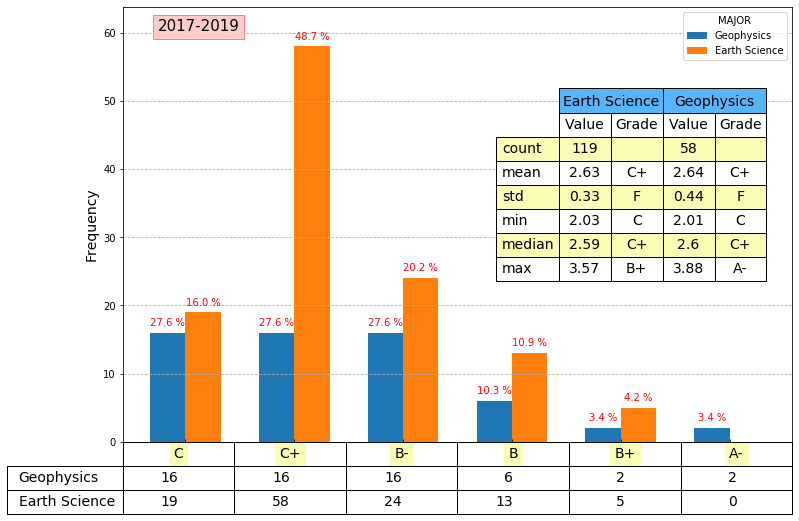

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None

df2017 = pd.read_excel("SCI 2017 GRADUATES ALL DEGREES.xlsx", sheet_name=1) # first sheet is a summary
df2018 = pd.read_excel("Copy of Grad-SCI-2018.xlsx", sheet_name=0) # sheet name unclear (multiple sheets)
df2019 = pd.read_excel("Copy of SCI 2019 GRADUATES ALL DEGREES 30-09-2019-CHEM.xlsx", sheet_name=0) # only one sheet (first)

list_df = [df2017, df2018, df2019]

df2017_cols = df2017.columns
df2018_cols = df2018.columns
df2019_cols = df2019.columns

common_cols_2017_2018 = df2017_cols.intersection(df2018_cols)
common_cols_2017_2019 = df2017_cols.intersection(df2019_cols)
common_cols_2018_2019 = df2018_cols.intersection(df2019_cols)

diff_cols_2017_2018 = df2017_cols.difference(df2018_cols)
diff_cols_2017_2019 = df2017_cols.difference(df2019_cols)
diff_cols_2018_2019 = df2018_cols.difference(df2019_cols)

all_years = pd.concat(list_df, join='inner', ignore_index=True)

all_years = all_years[all_years['DEGREE'] == 1].reset_index(drop=True)

all_years = all_years[['GRADE_YEAR', 'MAJOR', 'GENDER', 'GRADE_GPA']]

grade_leters = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F']
                
grade_minimum_value = [4, 3.7, 3.3, 3, 2.7, 2.3, 2, 1.7, 1.3, 1, 0]

df_grades = pd.DataFrame({'Grade Letters': grade_leters, 'Grade Minimum Value': grade_minimum_value})

df_grade_sorted = df_grades.sort_values('Grade Minimum Value')
 
all_years['Grade letter'] = pd.cut(all_years['GRADE_GPA'], 
                    bins=df_grade_sorted['Grade Minimum Value'].tolist() + [np.inf], 
                    labels=df_grade_sorted['Grade Letters'],
                    right=False)

ony_ersc_and_geop = all_years[(all_years['MAJOR'].isin(['Earth Science', 'Geophysics'])) &
                             (all_years['GRADE_GPA'] >= 2)].reset_index(drop=True)

graduation_res1 = ony_ersc_and_geop.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
graduation_res1 = graduation_res1.reindex(df_grades['Grade Letters'])
graduation_res1 = graduation_res1.dropna(axis=0, how='all')
graduation_res1 = graduation_res1.iloc[::-1]
graduation_res1_percent = ony_ersc_and_geop.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
graduation_res1_percent = graduation_res1_percent.reindex(df_grades['Grade Letters'])
graduation_res1_percent = graduation_res1_percent.dropna(axis=0, how='all')
graduation_res1_percent = graduation_res1_percent.iloc[::-1]

ony_ersc_and_geop_2017 = ony_ersc_and_geop[ony_ersc_and_geop['GRADE_YEAR'].isin(['2017'])].reset_index(drop=True)
ony_ersc_and_geop_2018 = ony_ersc_and_geop[ony_ersc_and_geop['GRADE_YEAR'].isin(['2018'])].reset_index(drop=True)
ony_ersc_and_geop_2019 = ony_ersc_and_geop[ony_ersc_and_geop['GRADE_YEAR'].isin(['2019'])].reset_index(drop=True)

ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.dropna(axis=0, how='all')
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.iloc[::-1]
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017_percent.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017_percent.dropna(axis=0, how='all')
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017_percent.iloc[::-1]

ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.dropna(axis=0, how='all')
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.iloc[::-1]
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018_percent.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018_percent.dropna(axis=0, how='all')
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018_percent.iloc[::-1]

ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.dropna(axis=0, how='all')
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.iloc[::-1]
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res[['Geophysics', 'Earth Science']]
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019_percent.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019_percent.dropna(axis=0, how='all')
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019_percent.iloc[::-1]

count_list = [graduation_res1, ony_ersc_and_geop_2017_res, ony_ersc_and_geop_2018_res,
             ony_ersc_and_geop_2019_res]
percent_list = [graduation_res1_percent, ony_ersc_and_geop_2017_percent, ony_ersc_and_geop_2018_percent,
               ony_ersc_and_geop_2019_percent]

def create_statistics(input_sheet, year=None):
    data_sheet = input_sheet.copy()
    stats_data_sheet = data_sheet.drop(columns=['GRADE_YEAR']).groupby(['MAJOR']).describe().T.round(2).droplevel(0)
    del stats_data_sheet.columns.name
    stats_data_sheet = stats_data_sheet.round(2)
    stats_data_sheet.iloc[0] = stats_data_sheet.iloc[0].astype(int)

    stats_data_sheet.drop(['25%', '75%'], inplace=True)
    stats_data_sheet = stats_data_sheet.rename(index={'50%': 'median'})

    stats_data_sheet['Grade letter ersc'] = pd.cut(stats_data_sheet['Earth Science'], 
                        bins=df_grade_sorted['Grade Minimum Value'].tolist() + [np.inf], 
                        labels=df_grade_sorted['Grade Letters'],
                        right=False)

    stats_data_sheet['Grade letter geop'] = pd.cut(stats_data_sheet['Geophysics'], 
                        bins=df_grade_sorted['Grade Minimum Value'].tolist() + [np.inf], 
                        labels=df_grade_sorted['Grade Letters'],
                        right=False)

    ersc_letters = []
    for i in range(len(stats_data_sheet)):
        ersc_letters.append(stats_data_sheet['Grade letter ersc'].values[i])

    geop_letters = []
    for i in range(len(stats_data_sheet)):
        geop_letters.append(stats_data_sheet['Grade letter geop'].values[i])

    stats_data_sheet['Grade letter ersc'] = ersc_letters
    stats_data_sheet['Grade letter geop'] = geop_letters

    stats_data_sheet = stats_data_sheet[['Earth Science', 'Grade letter ersc', 'Geophysics', 'Grade letter geop']]

    midx = pd.MultiIndex(levels=[['Earth Science', 'Geophysics'], ['Value','Grade']], codes=[[0,0,1,1,],[0,1,0,1,]])
    stats_data_sheet.columns = midx

    stats_data_sheet.iloc[0, 1] = ''
    stats_data_sheet.iloc[0, 3] = ''

    stats_data_sheet.iloc[0, 0] = '{0:g}'.format(stats_data_sheet.iloc[0, 0])
    stats_data_sheet.iloc[0, 2] = '{0:g}'.format(stats_data_sheet.iloc[0, 2])
    
    return stats_data_sheet

stats_all_years = create_statistics(ony_ersc_and_geop)
stats_all = create_statistics(ony_ersc_and_geop)
stats_2017 = create_statistics(ony_ersc_and_geop_2017)
stats_2018 = create_statistics(ony_ersc_and_geop_2018)
stats_2019 = create_statistics(ony_ersc_and_geop_2019)

fig, ax = plt.subplots(figsize=(12, 8))

graduation_res1_plt_bar = graduation_res1.plot.bar(ax=ax, table=True, width=0.65)

graduation_res1_plt_bar.axes.xaxis.set_ticklabels([])
graduation_res1_plt_bar.set_xlabel('')
graduation_res1_plt_bar.axes.tick_params(axis="x", direction="in", pad=-15)

for table in graduation_res1_plt_bar.tables:
    table.set_fontsize(14)
    table.auto_set_font_size(True)
    for row_col, cell in table.get_celld().items():
        if row_col[0] == 0 and row_col[1] >= 0:
            cell.set_text_props(backgroundcolor='#fafcb6')
        elif row_col[0] in [1, 2] and row_col[1] >= 0:
            cell.PAD = 0.5
        if cell.get_text().get_text() == 'nan':
            cell.set_text_props(text=0)
        elif row_col[0] > 0 and row_col[1] >= 0:
            cell.set_text_props(text='{:0.0f}'.format(float(cell.get_text().get_text())))

    table.scale(1, 2)
    
text_earc = np.round(graduation_res1_percent.iloc[:, 0], decimals=1)
text_geop = np.round(graduation_res1_percent.iloc[:, 1], decimals=1)

combined_text = np.concatenate([text_geop, text_earc])

for i, p in enumerate(ax.patches):
    text = combined_text[i]
    if np.isnan(text):
        text = ""
    else:
        text = "{} %".format(text)
    
    ax.annotate(text,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', color='r')
    
ax.grid(which='major', axis='y', linestyle='--')
ax.set_ylim([0, graduation_res1.max().max() + graduation_res1.max().max() * 0.1])
ax.set_ylabel('Frequency', fontsize=14)
ax.text(0.5, 62, '2017-2019', size=15, ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))


left, bottom, width, height = [0.6, 0.45, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

col_labels = stats_all_years.columns.levels[1].tolist() + stats_all_years.columns.levels[1].tolist()
row_labels = stats_all_years.index.tolist()
table_vals = stats_all_years.values.tolist()

# Draw table
header = ax2.table(cellText=[['']*2],
                      colLabels=['Earth Science', 'Geophysics'],
                      loc='top',
                      bbox=[0.1, 0.95, 0.8, 0.5])
                      
header.auto_set_font_size(False)
header.set_fontsize(14)
header.scale(2, 2)
header[(0, 0)].set_facecolor("#56b5fd")
header[(0, 1)].set_facecolor("#56b5fd")
the_table = ax2.table(cellText=table_vals,
                      colWidths=[0.1] * 4,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center',
                      cellLoc='center',)
the_table.auto_set_font_size(False)
the_table.set_fontsize(14)
the_table.scale(2, 2)

for row_col, cell in the_table.get_celld().items():
    if row_col[0] % 2 != 0:
        the_table[(row_col[0], row_col[1])].set_facecolor('#fafcb6')

# Removing ticks and spines enables you to get the figure only with table
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    ax2.spines[pos].set_visible(False)

# fig.savefig('all_years.pdf', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()

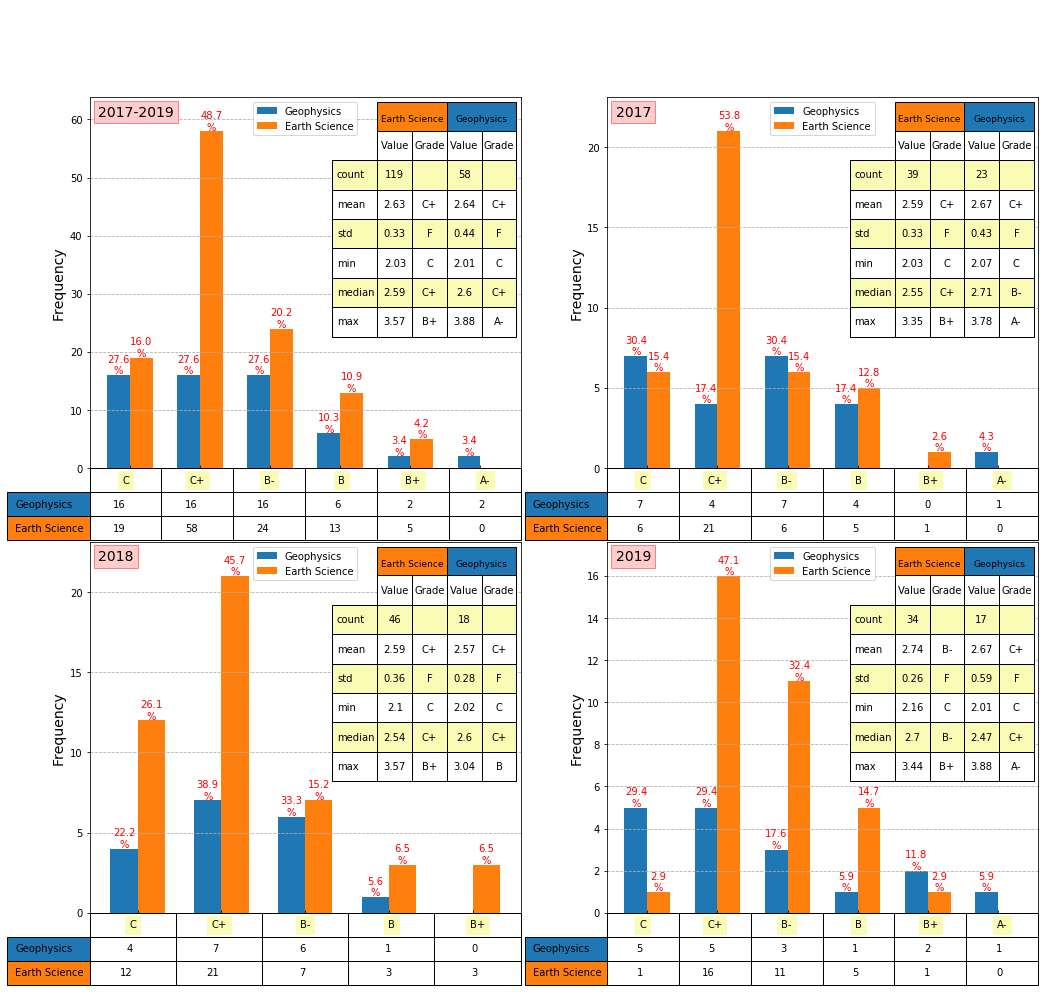

In [139]:
ony_ersc_and_geop_2017 = ony_ersc_and_geop[ony_ersc_and_geop['GRADE_YEAR'].isin(['2017'])].reset_index(drop=True)
ony_ersc_and_geop_2018 = ony_ersc_and_geop[ony_ersc_and_geop['GRADE_YEAR'].isin(['2018'])].reset_index(drop=True)
ony_ersc_and_geop_2019 = ony_ersc_and_geop[ony_ersc_and_geop['GRADE_YEAR'].isin(['2019'])].reset_index(drop=True)

ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.dropna(axis=0, how='all')
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.iloc[::-1]
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017_percent.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017_percent.dropna(axis=0, how='all')
ony_ersc_and_geop_2017_percent = ony_ersc_and_geop_2017_percent.iloc[::-1]

ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.dropna(axis=0, how='all')
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.iloc[::-1]
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018_percent.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018_percent.dropna(axis=0, how='all')
ony_ersc_and_geop_2018_percent = ony_ersc_and_geop_2018_percent.iloc[::-1]

ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019.groupby('MAJOR', sort=False)['Grade letter'].value_counts().unstack(0)
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.dropna(axis=0, how='all')
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.iloc[::-1]
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res[['Geophysics', 'Earth Science']]
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019.groupby('MAJOR')['Grade letter'].value_counts(normalize=True).unstack(0)*100
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019_percent.reindex(df_grades['Grade Letters'])
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019_percent.dropna(axis=0, how='all')
ony_ersc_and_geop_2019_percent = ony_ersc_and_geop_2019_percent.iloc[::-1]

fig, ax = plt.subplots(2, 2, figsize=(17, 15))
from mpl_toolkits.axes_grid.inset_locator import inset_axes
year_name = ['2017-2019', '2017', '2018', '2019']
for i, (data, perecent, stats) in enumerate(zip([graduation_res1, ony_ersc_and_geop_2017_res, ony_ersc_and_geop_2018_res,
                                          ony_ersc_and_geop_2019_res],[graduation_res1_percent,
    ony_ersc_and_geop_2017_percent, ony_ersc_and_geop_2018_percent, ony_ersc_and_geop_2019_percent
], [stats_all, stats_2017, stats_2018, stats_2019])):
    if i == 0:
        j = 0
        k = 0
    elif i == 1:
        j = 0
        k = 1
    elif i == 2:
        j = 1
        k = 0
    else:
        j = 1
        k = 1
        
    graduation_plt_bar = data.plot.bar(ax=ax[j, k], table=True, width=0.65, legend=False)
    
    patches, labels = graduation_plt_bar.get_legend_handles_labels()
    
    ax[j, k].legend(patches, labels, loc=9)

    graduation_plt_bar.axes.xaxis.set_ticklabels([])
    graduation_plt_bar.set_xlabel('')
    graduation_plt_bar.axes.tick_params(axis="x", direction="in", pad=-15)


    text_earc = np.round(perecent.iloc[:, 0], decimals=1)
    text_geop = np.round(perecent.iloc[:, 1], decimals=1)
    
    combined_text = np.concatenate([text_geop, text_earc])

    for m, p in enumerate(ax[j, k].patches):
        if m == 0:
            bar_color_geop = p.get_facecolor()
        elif m == combined_text.size - 1:
            bar_color_ersc = p.get_facecolor()
        text = combined_text[m]
        if np.isnan(text):
            text = ''
        else:
            text = "{}\n%".format(text)

        ax[j, k].annotate(text,
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10),
                        textcoords='offset points', color='r')
    for table in graduation_plt_bar.tables:
        table.auto_set_font_size(True)
        for row_col, cell in table.get_celld().items():
            if row_col[1] < 0:
                if row_col[0] == 1:
                    table[(row_col[0], row_col[1])].set_facecolor(bar_color_geop)
                elif row_col[0] == 2:
                    table[(row_col[0], row_col[1])].set_facecolor(bar_color_ersc)
            if row_col[0] == 0 and row_col[1] >= 0:
                cell.set_text_props(backgroundcolor='#fafcb6')
            elif row_col[0] in [1, 2] and row_col[1] >= 0:
                cell.PAD = 0.5
            if cell.get_text().get_text() == 'nan':
                cell.set_text_props(text=0)
            elif row_col[0] > 0 and row_col[1] >= 0:
                cell.set_text_props(text='{:0.0f}'.format(float(cell.get_text().get_text())))

        table.scale(1, 2)

    ax[j, k].grid(which='major', axis='y', linestyle='--')
    ax[j, k].set_ylim([0, data.max().max() + data.max().max() * 0.1])
    ax[j, k].set_ylabel('Frequency', fontsize=14)

    ax[j, k].annotate(year_name[i], xy=(0.02,0.95),xycoords='axes fraction',
             fontsize=14, bbox=dict(boxstyle="square",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8),
                       ))
    

    col_labels = stats.columns.levels[1].tolist() + stats.columns.levels[1].tolist()
    row_labels = stats.index.tolist()
    table_vals = stats.values.tolist()

    # Draw table
    inset_ax = inset_axes(ax[j, k],
                          height="70%", # set height
                          width="35%", # and width
                          borderpad=0,
                          bbox_transform=ax[j, k].transAxes,
                          bbox_to_anchor=(-0.12, -0.505, 1.15, 1.75)
                         )
    header = inset_ax.table(cellText=[['']*2],
                          colLabels=['Earth Science', 'Geophysics'],
                          loc='top',
                          bbox=[0.1, 0.64, 0.8, 0.15])

    header.auto_set_font_size(False)
    header.set_fontsize(9)
    header.scale(2, 2)
    header[(0, 0)].set_facecolor(bar_color_ersc)
    header[(0, 1)].set_facecolor(bar_color_geop)
    the_table = inset_ax.table(cellText=table_vals,
                          colWidths=[0.1] * 4,
                          rowLabels=row_labels,
                          colLabels=col_labels,
                          loc='center',
                          cellLoc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(2, 2)

    for row_col, cell in the_table.get_celld().items():
        if row_col[0] % 2 != 0:
            the_table[(row_col[0], row_col[1])].set_facecolor('#fafcb6')

    inset_ax.axis('off')

# fig.savefig('all_years.pdf', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
fig.savefig('combined_2x2.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

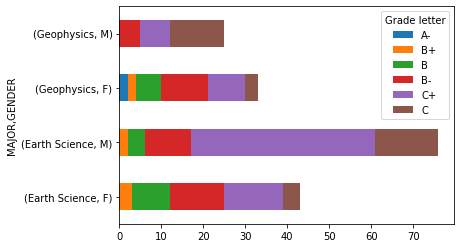

In [140]:
ony_ersc_and_geop_2017_res = ony_ersc_and_geop_2017_res.fillna(0)
ony_ersc_and_geop_2018_res = ony_ersc_and_geop_2018_res.fillna(0)
ony_ersc_and_geop_2019_res = ony_ersc_and_geop_2019_res.fillna(0)
graduation_mf = ony_ersc_and_geop.groupby(['MAJOR', 'GENDER'], sort=True)['Grade letter'].value_counts(normalize=True).unstack()*100
graduation_mf = ony_ersc_and_geop.groupby(['MAJOR', 'GENDER'], sort=True)['Grade letter'].value_counts().unstack()
graduation_mf = graduation_mf.reindex(sorted(
    graduation_mf.columns, key=lambda x: (x[0], - x.endswith('+') + x.endswith('-'))), axis=1)
graduation_mf_per = ony_ersc_and_geop.groupby(['MAJOR', 'GENDER'], sort=True)['Grade letter'].value_counts(
    normalize=True).unstack()*100
graduation_mf_per = graduation_mf_per.reindex(sorted(
    graduation_mf_per.columns, key=lambda x: (x[0], - x.endswith('+') + x.endswith('-'))), axis=1)

graduation_mf = graduation_mf.fillna(0).astype(int)
graduation_mf_ersc = graduation_mf.xs('Earth Science', level='MAJOR')
graduation_mf_geop = graduation_mf.xs('Geophysics', level='MAJOR')

graduation_mf_per = graduation_mf_per.fillna(0).round(1)
graduation_mf_per_ersc = graduation_mf_per.xs('Earth Science', level='MAJOR')
graduation_mf_per_geop = graduation_mf_per.xs('Geophysics', level='MAJOR')

geology = graduation_mf.xs('Earth Science', level='MAJOR')
geophysics = graduation_mf.xs('Geophysics', level='MAJOR')

geology.index = ['Female', 'Male']
geophysics.index = ['Female', 'Male']

colors = []
for m, p in enumerate(graduation_mf.plot.barh(stacked=True).patches):
    colors.append(p.get_facecolor())
colors = colors[::4]

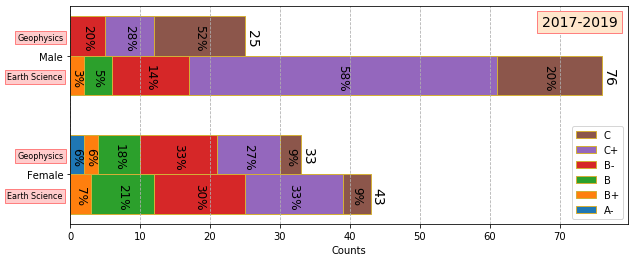

In [141]:


fig, ax = plt.subplots(figsize=(10, 4))
import random


for i in range(graduation_mf_ersc.columns.size):
    ax.barh([2, 5], geology[geology.columns[i]], height=1, left=geology.iloc[:, :i].sum(axis=1),
            label=geology.columns[i], color=colors[i], ec='#d4af37')
    ax.barh([3, 6], geophysics[geophysics.columns[i]], height=1, left=geophysics.iloc[:, :i].sum(axis=1), color=colors[i],
           ec='#d4af37')
        
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
ax.grid(which='major', axis='x', linestyle='--')
ax.yaxis.set_ticks([2.5, 5.5])
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = ['Female', 'Male']
ax.set_yticklabels(labels)

for text, loc in zip(["Earth Science", "Earth Science", "Geophysics", "Geophysics"], [2, 5, 3, 6]):
    if text == 'Geophysics':
        x_loc = -7.5
    else:
        x_loc = -9
    ax.text(x_loc,
             loc-0.1,
             text, fontsize=8, bbox=dict(boxstyle="square",
                           ec=(1., 0.5, 0.5),
                           fc=(1., 0.8, 0.8),
                           ))
number = graduation_mf_per.values.flatten('F') # flatten fortran order
for i, p in enumerate(ax.patches):
    text = number[i]
    if text == 0:
        text = ""
    else:
        text = "{:.0f}%".format(text)

    ax.annotate(text,
                    ((p.get_x() + p.get_width()/2), p.get_y()+0.2),
                    ha='center', va='center', xytext=(0, 10), fontsize=12,
                    textcoords='offset points', color='k', rotation=-90)
    if p.get_y() == float(1.5) and i == len(ax.patches) - 4:
        count_value = geology.sum(axis=1).loc['Female']
        ax.annotate(count_value,
                    ((p.get_x() + p.get_width()) + 1, p.get_y()+0.2),
                    ha='center', va='center', xytext=(0, 10), fontsize=14,
                    textcoords='offset points', color='k', rotation=-90)
        
    elif p.get_y() == float(4.5) and i == len(ax.patches) - 3:
        count_value = geology.sum(axis=1).loc['Male']
        ax.annotate(count_value,
                    ((p.get_x() + p.get_width()) + 1, p.get_y()+0.2),
                    ha='center', va='center', xytext=(0, 10), fontsize=14,
                    textcoords='offset points', color='k', rotation=-90)
    elif p.get_y() == float(2.5) and i == len(ax.patches) - 2:
        count_value = geophysics.sum(axis=1).loc['Female']
        ax.annotate(count_value,
                    ((p.get_x() + p.get_width()) + 1, p.get_y()+0.2),
                    ha='center', va='center', xytext=(0, 10), fontsize=14,
                    textcoords='offset points', color='k', rotation=-90)
    elif p.get_y() == float(5.5) and i == len(ax.patches) - 1:
        count_value = geophysics.sum(axis=1).loc['Male']
        ax.annotate(count_value,
                    ((p.get_x() + p.get_width()) + 1, p.get_y()+0.2),
                    ha='center', va='center', xytext=(0, 10), fontsize=14,
                    textcoords='offset points', color='k', rotation=-90)
    
ax.set_xlabel('Counts')
# ax.axhline(y=2.5, color='k', linestyle='dotted')
# ax.axhline(y=5.5, color='k', linestyle='dotted')

ax.annotate("2017-2019", xy=(0.845,0.91),xycoords='axes fraction',
             fontsize=14, bbox=dict(boxstyle="square",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.9, 0.8),
                       ))

fig.savefig('percentage_male_female.png', bbox_inches='tight', pad_inches=0.05)
plt.show()


In [19]:
all_years['MAJOR'].unique()

array(['Biotechnology', 'Environmental Biology', 'Geophysics',
       'Applied Chemistry', 'Chemistry', 'Earth Science', 'Mathematics',
       'Physics', 'Statistics', 'Computer Science'], dtype=object)

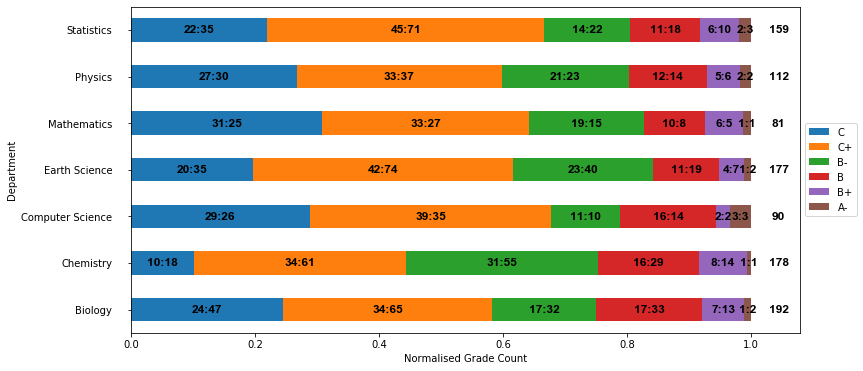

In [161]:
all_years_dep = all_years.replace({'MAJOR' : { 'Biotechnology' : 'Biology', 'Environmental Biology' : 'Biology',
                                          'Geophysics' : 'Earth Science',
                                         'Applied Chemistry': 'Chemistry'}})

fig, ax = plt.subplots(figsize=(12, 6))

col = all_years_dep.groupby(['MAJOR'], sort=True)['Grade letter'].value_counts(normalize=True).unstack().columns.tolist()[::-1]

all_years_dep_nor = all_years_dep.groupby(['MAJOR'], sort=True)['Grade letter'].value_counts(normalize=True).unstack()


all_years_dep_org = all_years_dep.groupby(['MAJOR'], sort=True)['Grade letter'].value_counts().unstack()

all_years_dep_nor = all_years_dep_nor[['C', 'C+', 'B-', 'B', 'B+', 'A-']]

all_years_dep_org = all_years_dep_org[['C', 'C+', 'B-', 'B', 'B+', 'A-']]

all_years_dep_org_sum = all_years_dep_org.sum(axis=1)

all_years_dep_nor.plot(kind='barh', ax=ax, stacked=True)

data_flat_nor = all_years_dep_nor.values.flatten('F')

data_flat_org = all_years_dep_org.values.flatten('F')

ax.set_ylabel('Department')
ax.set_xlabel('Normalised Grade Count')

title_font = {'fontname':'Arial', 'size':'12', 'color':'black', 'weight':'bold'}

for i, (rect, value, value_org) in enumerate(zip(ax.patches, data_flat_nor, data_flat_org)):
    if value != 0:
        value = "{:0.0f}:{:n}".format(value*100, value_org)
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        w2 = rect.get_width()
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',
                verticalalignment='center', **title_font)
        
        if i >= data_flat_nor.size - 7:
            loc = i - i//7*7
            value2 = all_years_dep_org.sum(axis=1).iloc[loc]
            ax.text(x+w2+0.045, y+h,value2, horizontalalignment='center',
                    verticalalignment='center', **title_font)
        
        
        
ax.tick_params(axis='y', which='major', pad=15)
ax.set_xlim([0, 1.08])

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

fig.savefig('all_college.png', bbox_inches='tight', pad_inches=0.05)


plt.show()

In [107]:
all_years_dep_nor

Grade letter,C+,C,B-,B+,B,A-
MAJOR,,,,,,
Biology,0.338542,0.244792,0.166667,0.067708,0.171875,0.010417
Chemistry,0.342697,0.101124,0.308989,0.078652,0.162921,0.005618
Computer Science,0.388889,0.288889,0.111111,0.022222,0.155556,0.033333
Earth Science,0.418079,0.197740,0.225989,0.039548,0.107345,0.011299
Mathematics,0.333333,0.308642,0.185185,0.061728,0.098765,0.012346
Physics,0.330357,0.267857,0.205357,0.053571,0.125000,0.017857
Statistics,0.446541,0.220126,0.138365,0.062893,0.113208,0.018868


In [108]:
data_flat_nor

array([0.33854167, 0.34269663, 0.38888889, 0.4180791 , 0.33333333,
       0.33035714, 0.44654088, 0.24479167, 0.1011236 , 0.28888889,
       0.19774011, 0.30864198, 0.26785714, 0.22012579, 0.16666667,
       0.30898876, 0.11111111, 0.2259887 , 0.18518519, 0.20535714,
       0.13836478, 0.06770833, 0.07865169, 0.02222222, 0.03954802,
       0.0617284 , 0.05357143, 0.06289308, 0.171875  , 0.16292135,
       0.15555556, 0.10734463, 0.09876543, 0.125     , 0.11320755,
       0.01041667, 0.00561798, 0.03333333, 0.01129944, 0.01234568,
       0.01785714, 0.01886792])

In [110]:
data_flat_org

array([65, 47, 32, 13, 33,  2, 61, 18, 55, 14, 29,  1, 35, 26, 10,  2, 14,
        3, 74, 35, 40,  7, 19,  2, 27, 25, 15,  5,  8,  1, 37, 30, 23,  6,
       14,  2, 71, 35, 22, 10, 18,  3], dtype=int64)

In [111]:
all_years_dep_org

Grade letter,C+,C,B-,B+,B,A-
MAJOR,,,,,,
Biology,65,47,32,13,33,2
Chemistry,61,18,55,14,29,1
Computer Science,35,26,10,2,14,3
Earth Science,74,35,40,7,19,2
Mathematics,27,25,15,5,8,1
Physics,37,30,23,6,14,2
Statistics,71,35,22,10,18,3


In [ ]:
np.split(data_flat_org)